In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


Membaca dataset

In [88]:
# read the dataset from dir
df = pd.read_csv("diabetes.csv")

Menampilkan beberapa baris pertama dari DataFrame

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Menampilkan informasi ringkas tentang DataFrame

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Menghasilkan ringkasan statistik deskriptif dari DataFrame

In [92]:
# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Menampilkan jumlah baris dan kolom

In [93]:
# (row, columns)
df.shape

(768, 9)

Menghitung persentase dari nilai dalam kolom 'Outcome' dalam DataFrame

In [94]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

 Membuat histogram dari variabel 'Age' dalam DataFrame

<Axes: xlabel='Age', ylabel='Count'>

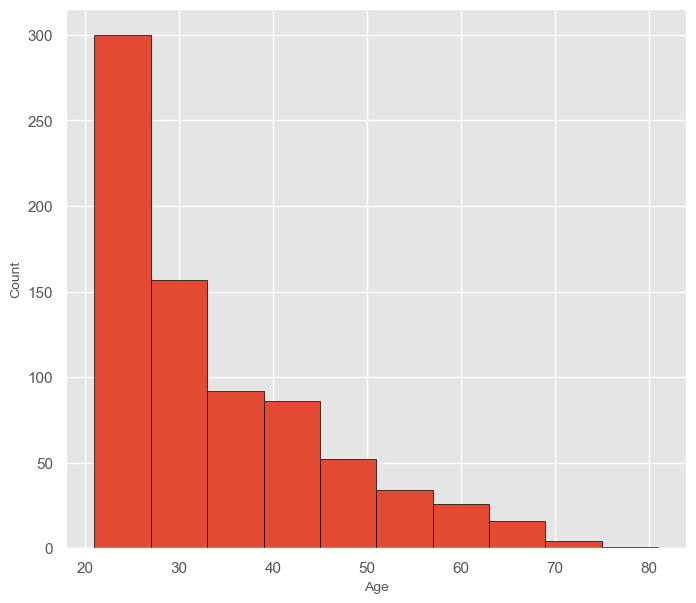

In [95]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

Mengambil nilai maksimum dari kolom 'Age'

In [96]:
df['Age'].max()

81

Mengambil nilai minimum dari kolom 'Age'

In [97]:
df['Age'].min()

21

In [98]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Membuat grafik density plot (kepadatan) untuk beberapa kolom dalam DataFrame untuk melihat apakah data terkonsentrasi di sekitar nilai tertentu atau tersebar merata

<Axes: xlabel='Age', ylabel='Density'>

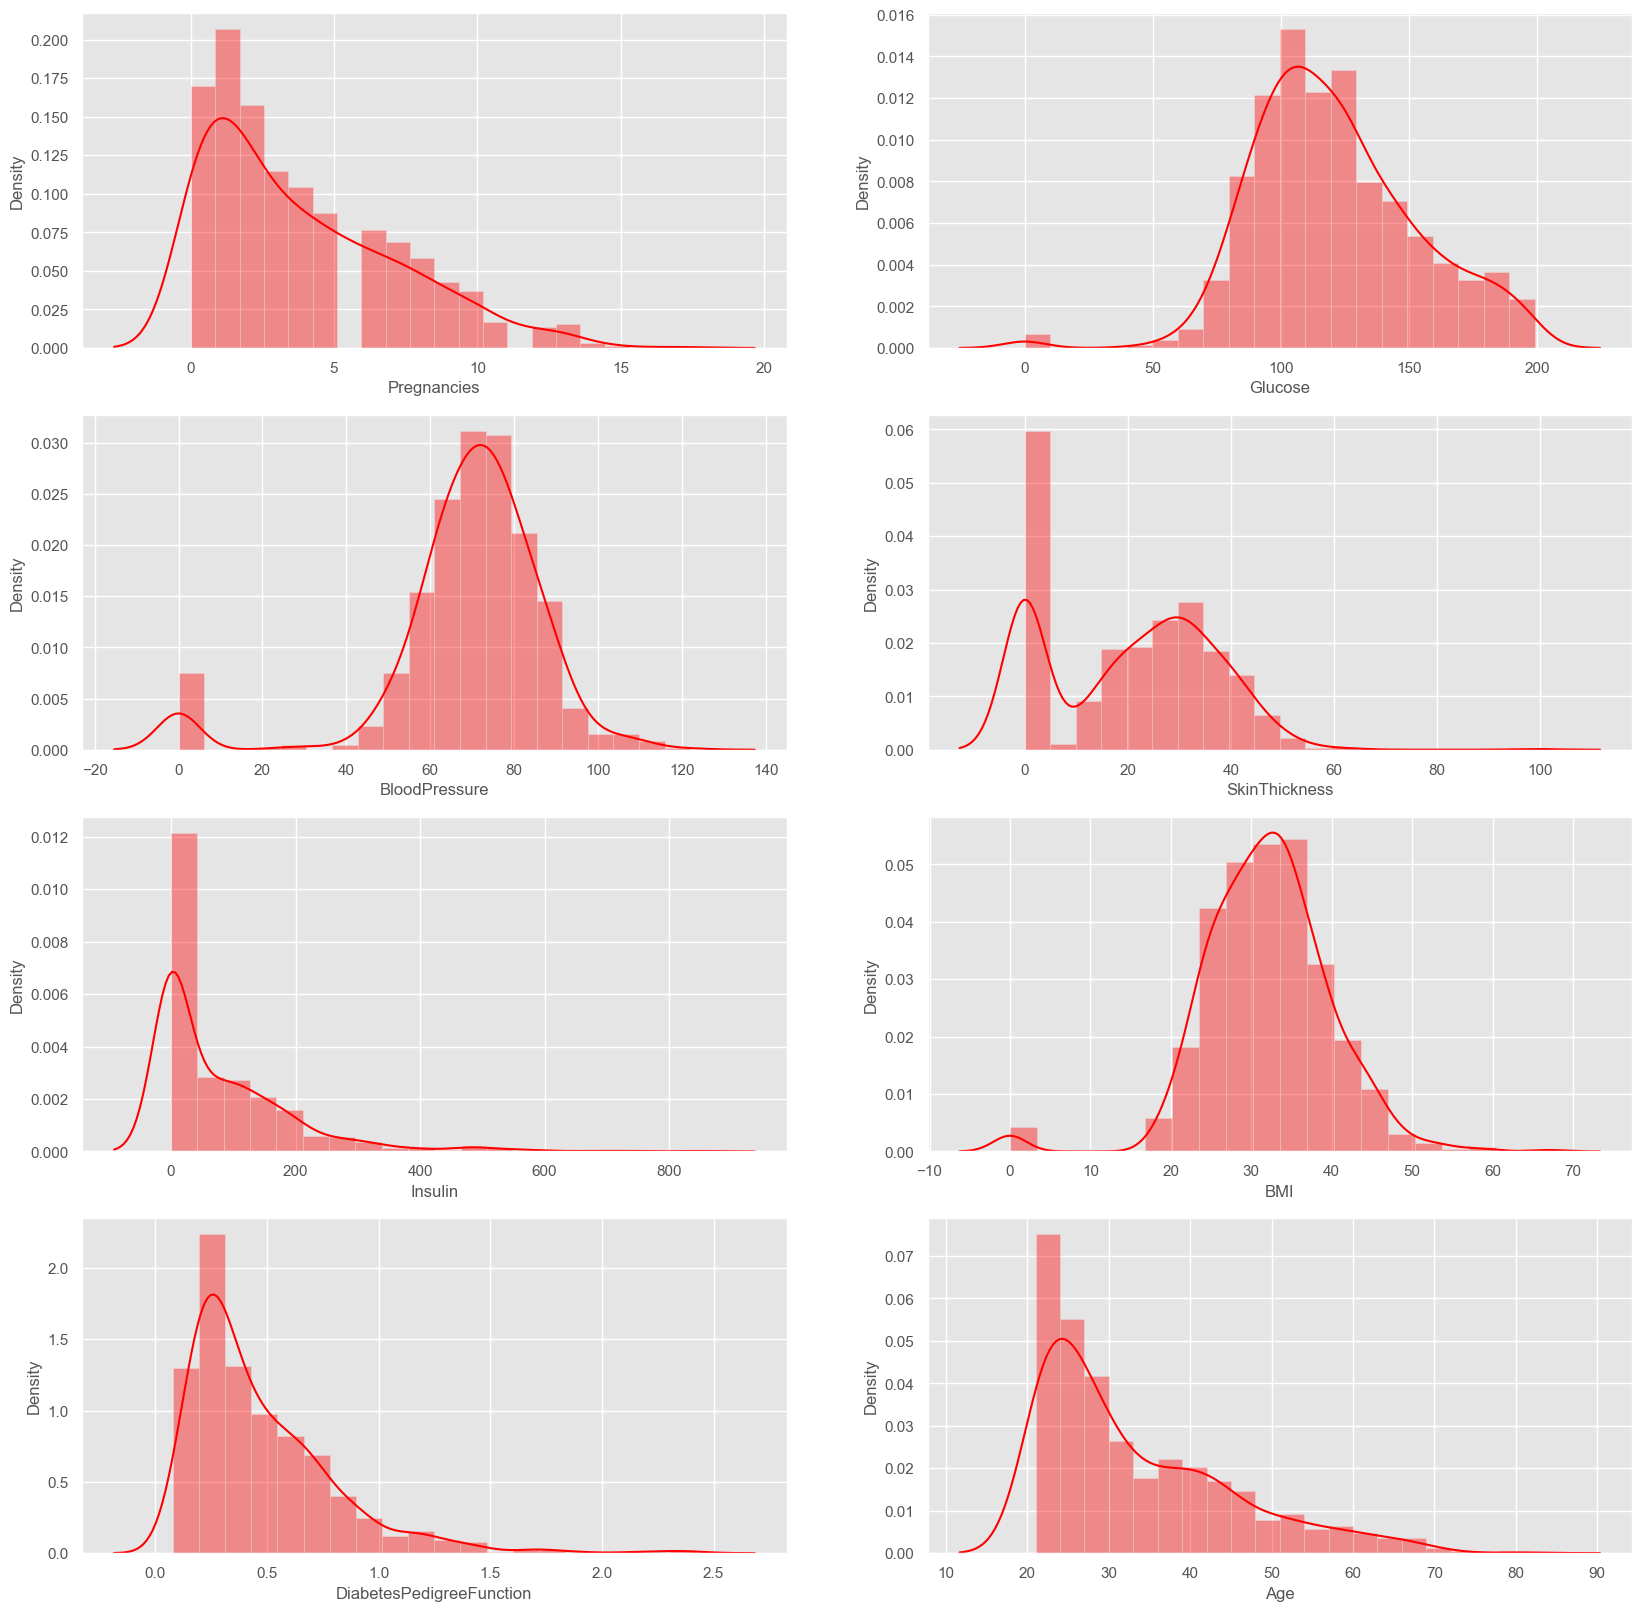

In [100]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [101]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Mengelompokkan data berdasarkan nilai dalam kolom 'Outcome' dan kemudian menghitung rata-rata (mean) dari kolom 'Pregnancies' untuk setiap kelompok 'Outcome'.

In [102]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


Mengelompokkan data berdasarkan nilai dalam kolom 'Outcome' dan kemudian menghitung nilai maksimum (max) dari kolom 'Pregnancies' untuk setiap kelompok 'Outcome'.

In [103]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


Mengelompokkan data berdasarkan nilai dalam kolom 'Outcome' dan menghitung rata-rata (mean) dari kolom 'Glucose' untuk setiap kelompok 'Outcome'.

In [104]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


Mengelompokkan data berdasarkan nilai dalam kolom 'Outcome' dan kemudian menghitung nilai maksimum (max) dari kolom 'Glucose' untuk setiap kelompok 'Outcome'.

In [105]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


Membuat dua jenis visualisasi dari kolom 'Outcome' dalam DataFrame, yang menunjukkan distribusi kategori 'healthy' dan 'diabetes'.

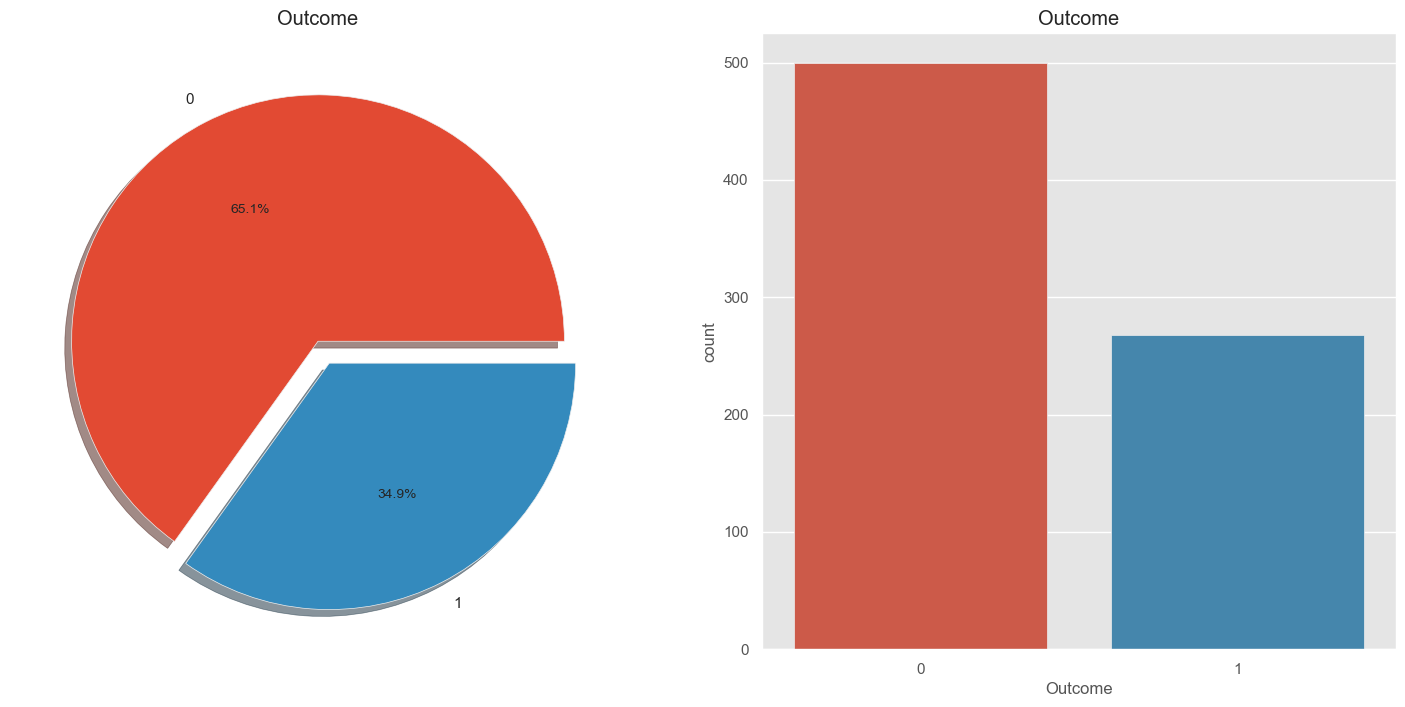

In [106]:
# 0>healthy
# 1>diabetes

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

# Show the plot
plt.show()

Melakukan perhitungan korelasi antar kolom dalam DataFrame

In [107]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Membuat HeatMap yang menunjukkan matriks korelasi antar kolom dalam DataFrame

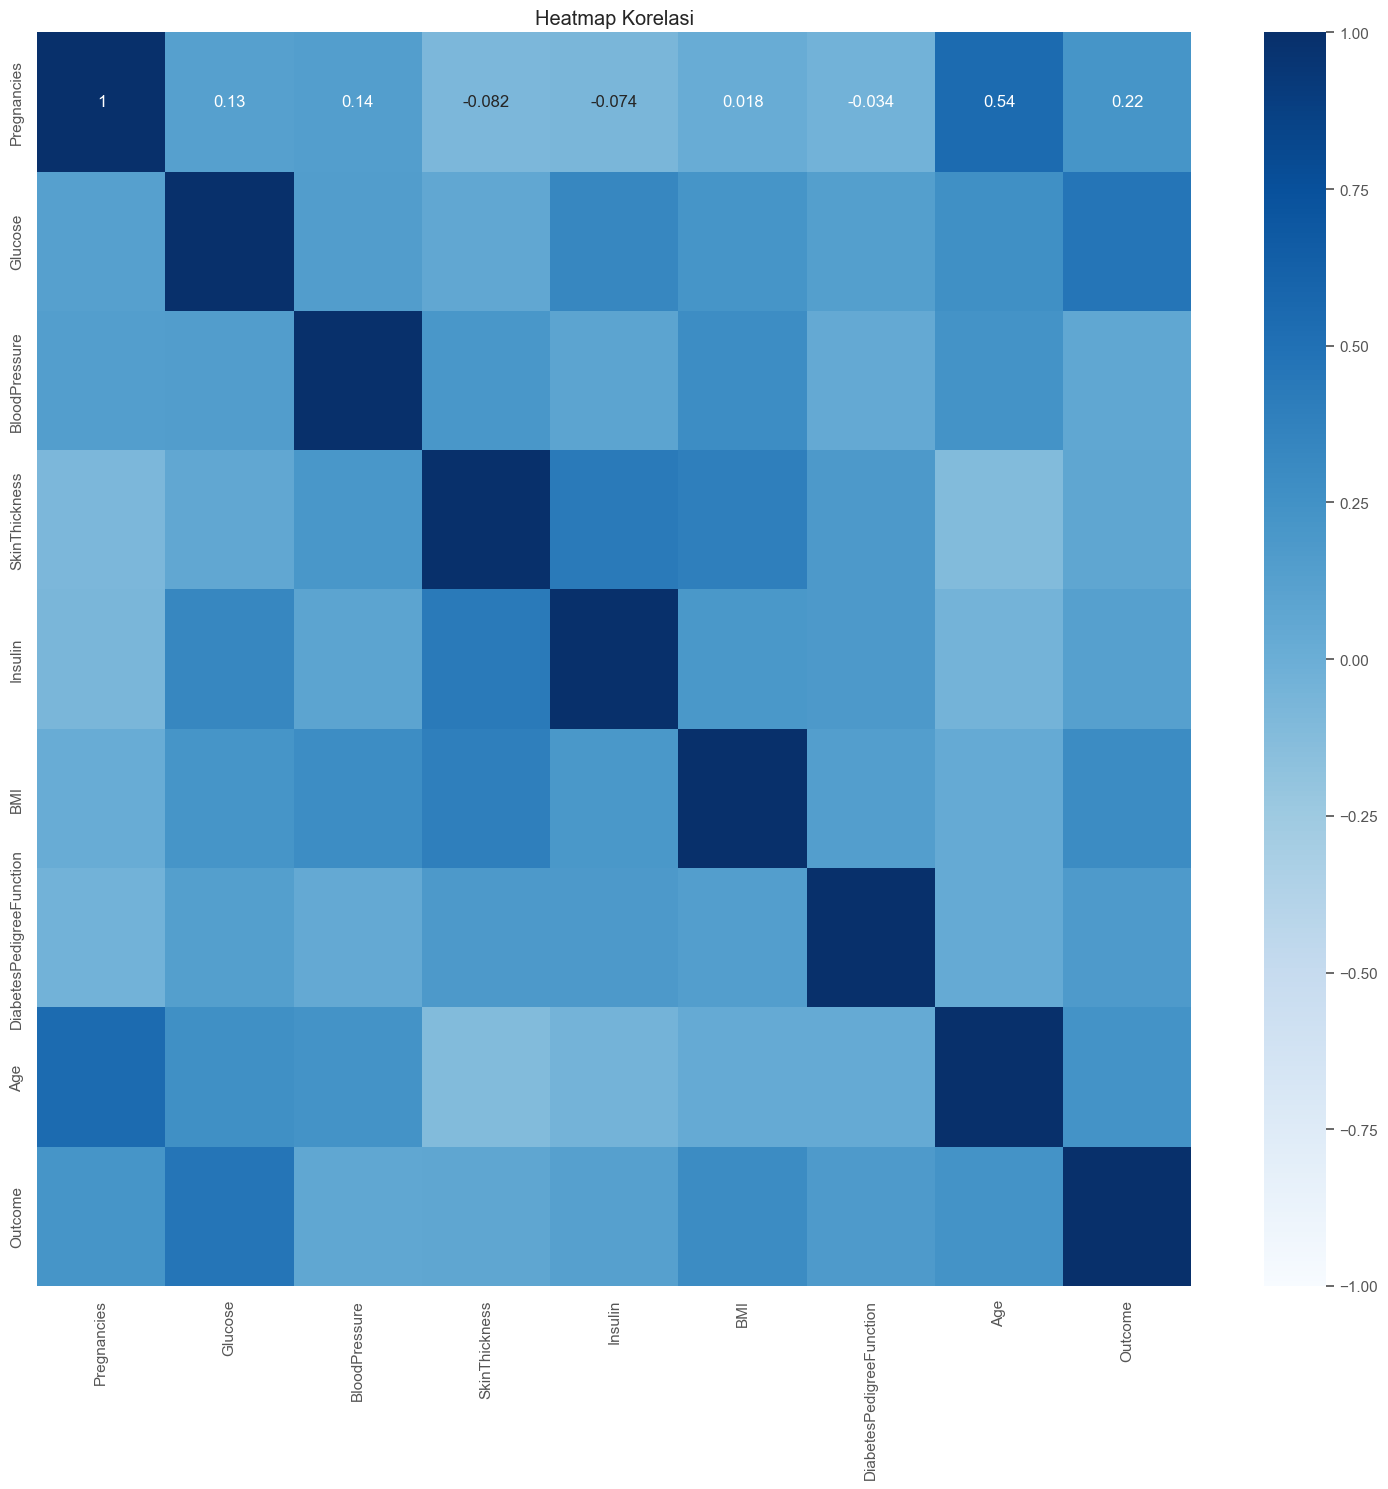

In [108]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1, annot_kws={'size': 12})
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

In [109]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Mengganti nilai 0 dalam kolom-kolom tertentu dalam DataFrame dengan nilai NaN

In [110]:
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

Menghitung jumlah nilai null (NaN) dalam setiap kolom

In [111]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [112]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Menghitung nilai median dari suatu variabel berdasarkan nilai target atau label, dalam hal ini 'Outcome' (0 untuk sehat, 1 untuk diabetes).

In [113]:
#median
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

Mengisi nilai null dalam setiap kolom numerik kecuali kolom "Outcome" berdasarkan nilai median dari kolom tersebut tergantung pada nilai "Outcome" (0 untuk sehat, 1 untuk diabetes)

In [114]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [116]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Membuat Pair Plot yang berguna untuk mengeksplorasi hubungan antara pasangan variabel dalam dataset, dengan membagi plot berdasarkan nilai dari variabel "Outcome" (0 untuk sehat, 1 untuk diabetes).

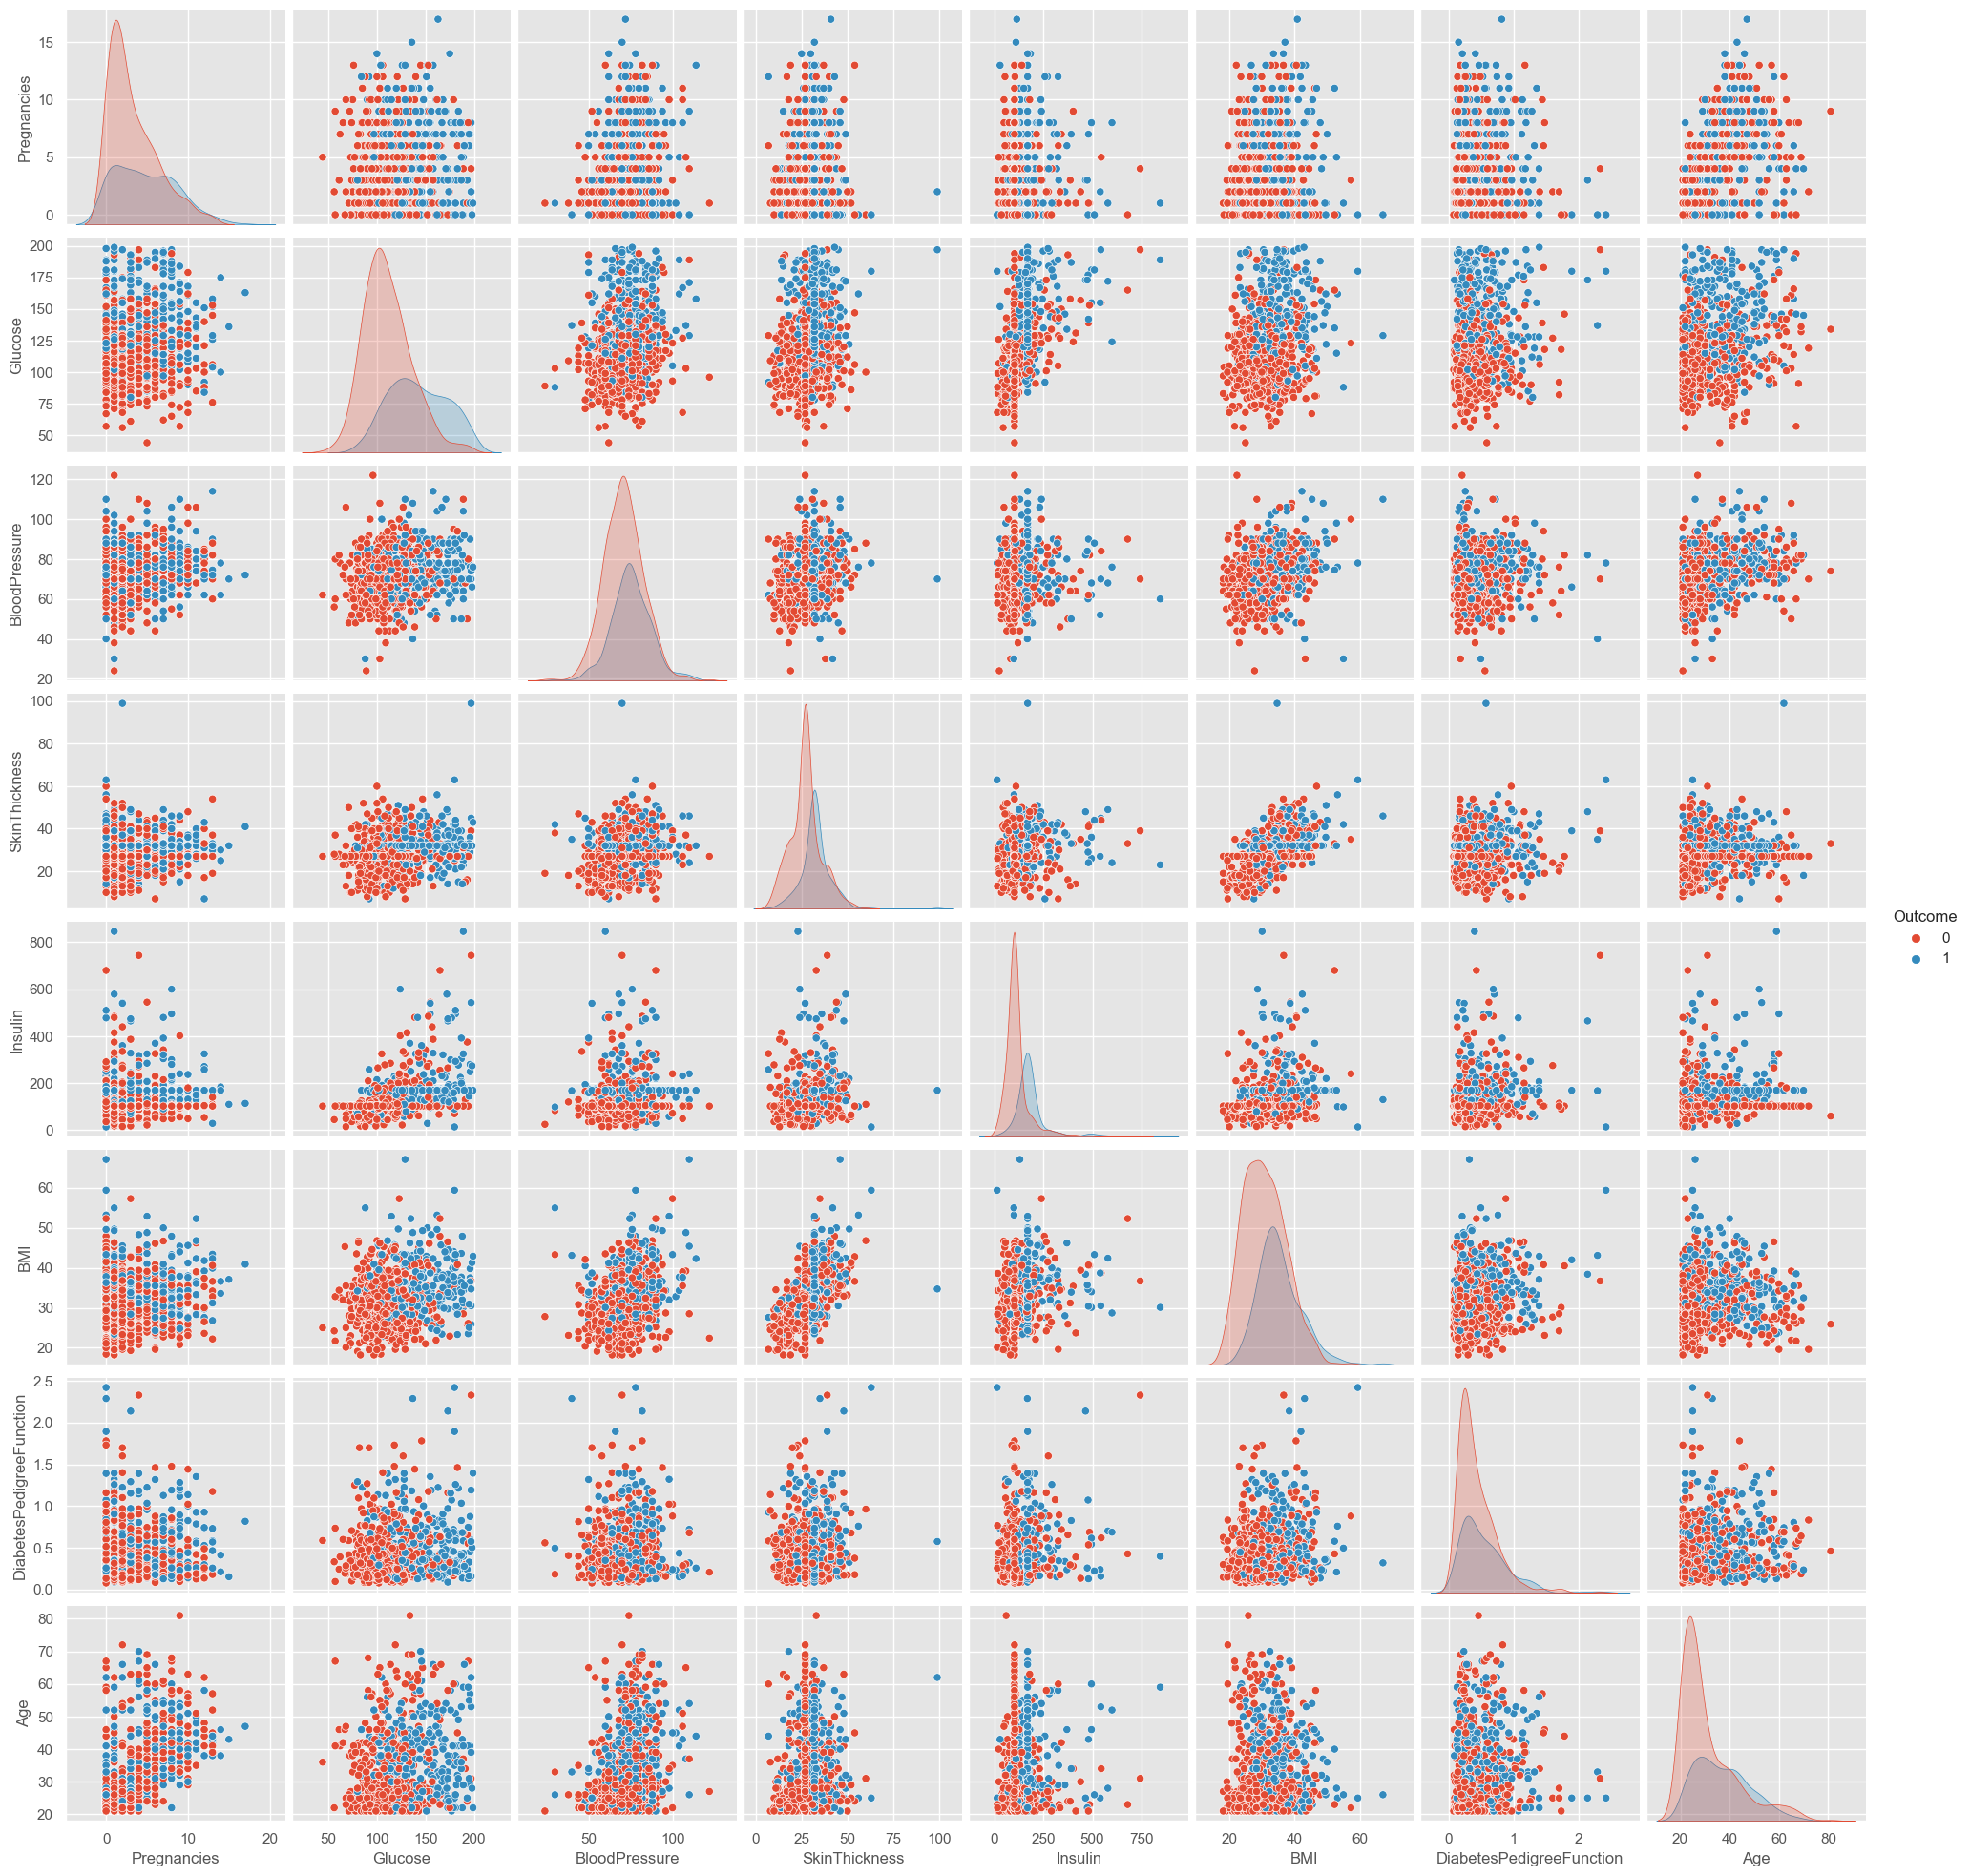

In [117]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

Mendeteksi outlier dalam setiap kolom

In [118]:
# Outlier Detection
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


Membuat boxplot untuk menunjukkan distribusi data, outlier, dan nilai-nilai kuartil dari suatu variabel.

<Axes: xlabel='Insulin'>

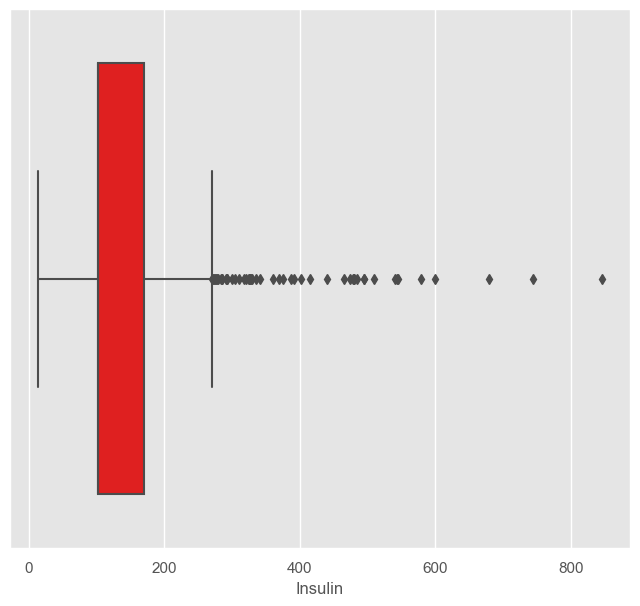

In [119]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

<Axes: xlabel='Pregnancies'>

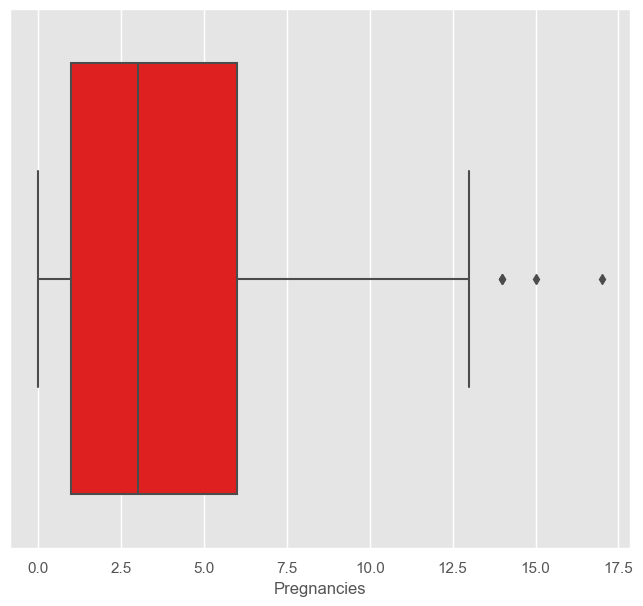

In [120]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

<Axes: xlabel='BloodPressure'>

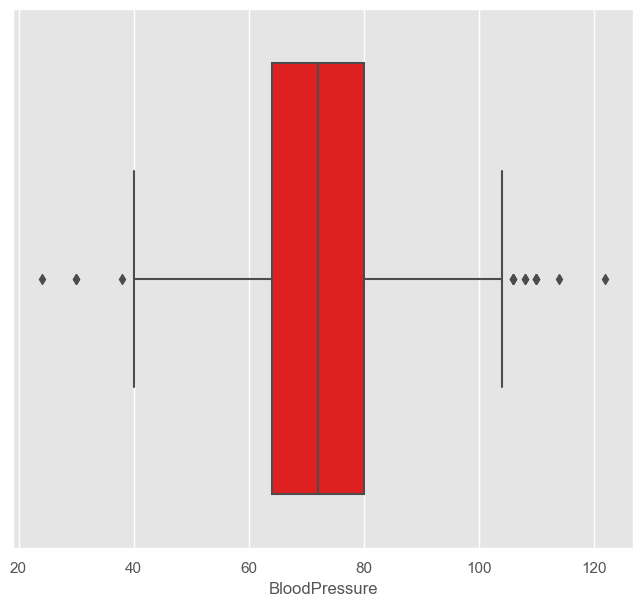

In [121]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BloodPressure"], color="red")

<Axes: xlabel='SkinThickness'>

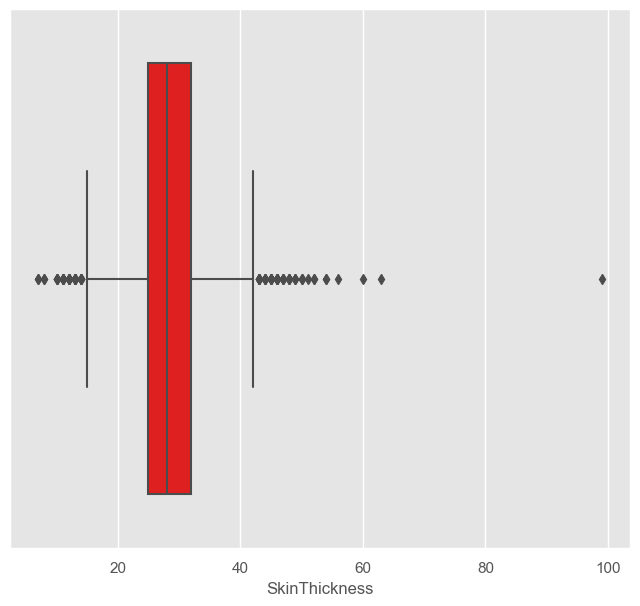

In [122]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["SkinThickness"], color="red")

<Axes: xlabel='BMI'>

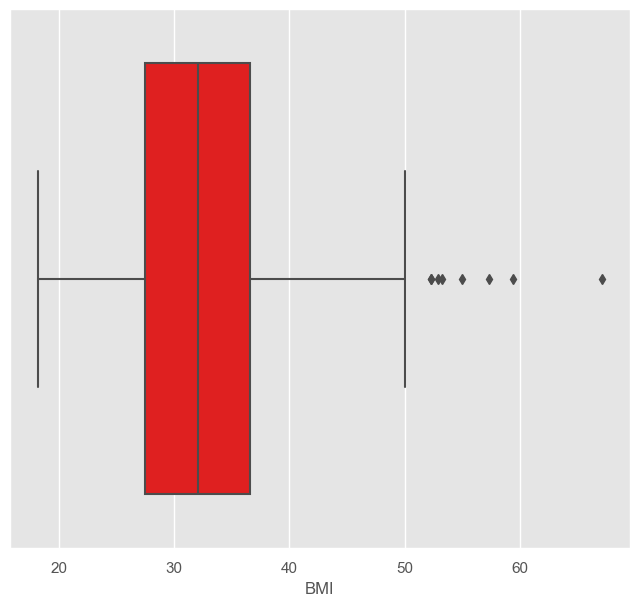

In [123]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BMI"], color="red")

<Axes: xlabel='DiabetesPedigreeFunction'>

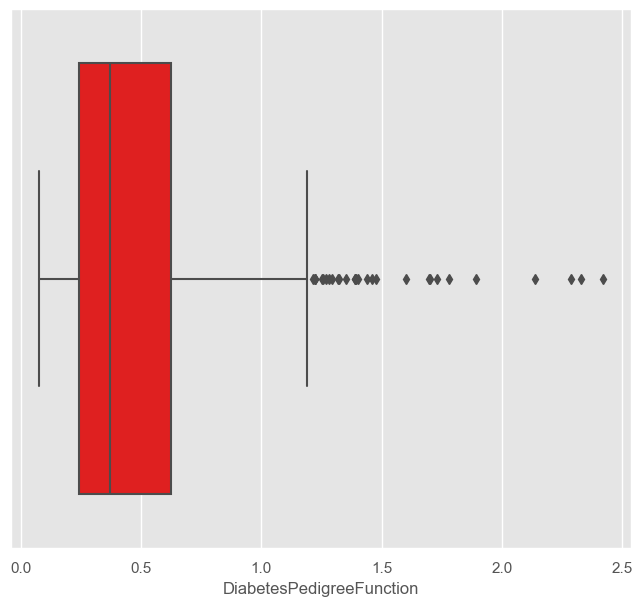

In [124]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["DiabetesPedigreeFunction"], color="red")

<Axes: xlabel='Age'>

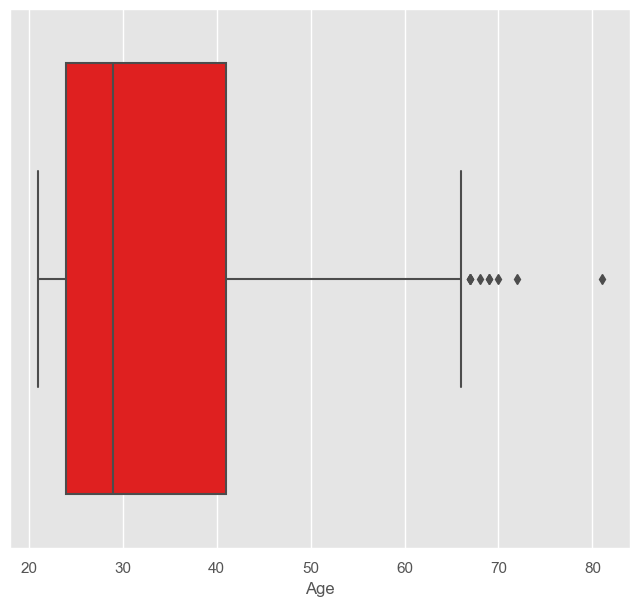

In [125]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Age"], color="red")

Mendeteksi outlier menggunakan metode LOF (untuk mendeteksi outlier berdasarkan "local density deviation" dari suatu observasi terhadap tetangganya.)

In [126]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [127]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Mendapatkan 20 nilai terkecil dari skor faktor outlier negatif (negative outlier factor) yang dihasilkan oleh model LOF (Local Outlier Factor). Skor ini mengindikasikan seberapa jauh setiap titik data dari tetangga-tetangganya dalam konteks local density.

In [128]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.30445978, -3.05893469, -2.48884101, -2.37289269, -2.15297995,
       -2.09708735, -2.0772561 , -2.01096252, -1.95255968, -1.86384019,
       -1.74003158, -1.72703492, -1.71674689, -1.70343883, -1.6688722 ,
       -1.64296768, -1.64190437, -1.61620872, -1.61369917, -1.60057603])

Mengambil nilai skor faktor outlier negatif yang berada pada posisi indeks ke-7 setelah diurutkan dari nilai terkecil hingga terbesar.

In [129]:
thresold = np.sort(df_scores)[7]

In [130]:
thresold

-2.0109625157063844

In [131]:
outlier = df_scores>thresold

Menghapus outlier berdasarkan nilai yang didapat dari model LOF (Local Outlier Factor)

In [132]:
df = df[outlier]

In [133]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [134]:
df.shape

(760, 9)

Feauture Engineering

Membuat sebuah objek Series

In [135]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [136]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

 Membuat kolom baru "NewBMI"

In [137]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [138]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


Mengevaluasi nilai dalam kolom "Insulin" dari setiap baris dan mengembalikan label "Normal" atau "Abnormal" berdasarkan kriteria tertentu.



In [139]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

menambahkan kolom baru bernama NewInsulinScore

In [140]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [141]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


Menambahkan kolom baru "NewGlucose"

In [142]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [143]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


Melakukan one-hot encoding pada kolom-kolom kategorikal dalam DataFrame df. Metode ini akan mengubah setiap nilai kategori dalam kolom-kolom yang ditentukan menjadi variabel biner (0 atau 1), yang dikenal sebagai dummy variables atau variabel indikator.

In [144]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [145]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [146]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

Memisahkan kolom Numerik dan Kategorik

In [147]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [148]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [149]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [150]:
cols = X.columns
index = X.index

In [151]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


Menskalakan data dengan menggunakan RobustScaler. Ini sangat berguna dalam berbagai algoritma machine learning yang sensitif terhadap skala data. Langkah ini penting dalam prapemrosesan data yang membantu meningkatkan kinerja dan stabilitas model machine learning

In [152]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [153]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.770186,0.000,1.000000,1.000000,0.177778,0.672313,1.235294
1,-0.4,-0.795031,-0.375,0.142857,0.000000,-0.600000,-0.046906,0.117647
2,1.0,1.639752,-0.500,0.571429,1.000000,-0.966667,0.789577,0.176471
3,-0.4,-0.695652,-0.375,-0.714286,-0.126866,-0.433333,-0.526384,-0.470588
4,-0.6,0.496894,-2.000,1.000000,0.977612,1.233333,5.000651,0.235294


In [154]:
X = pd.concat([X, categorical_df], axis=1)

In [155]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.770186,0.000,1.000000,1.000000,0.177778,0.672313,1.235294,False,True,False,False,False,False,False,False,False,True
1,-0.4,-0.795031,-0.375,0.142857,0.000000,-0.600000,-0.046906,0.117647,False,True,False,False,False,True,False,True,False,False
2,1.0,1.639752,-0.500,0.571429,1.000000,-0.966667,0.789577,0.176471,False,True,False,False,False,False,False,False,False,True
3,-0.4,-0.695652,-0.375,-0.714286,-0.126866,-0.433333,-0.526384,-0.470588,False,True,False,False,False,True,False,True,False,False
4,-0.6,0.496894,-2.000,1.000000,0.977612,1.233333,5.000651,0.235294,False,False,True,False,False,False,False,False,False,True


Handling Imbalance Class in Dataset using SMOTE

In [156]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Melihat Distribusi Data setelah menggunakan SMOTE

In [157]:
count_class_0 = (y_resampled == 0).sum()
print("Jumlah nilai kelas 0 setelah SMOTE:", count_class_0)

Jumlah nilai kelas 0 setelah SMOTE: 496


In [158]:
count_class_1 = (y_resampled == 1).sum()
print("Jumlah nilai kelas 1 setelah SMOTE:", count_class_1)

Jumlah nilai kelas 1 setelah SMOTE: 496


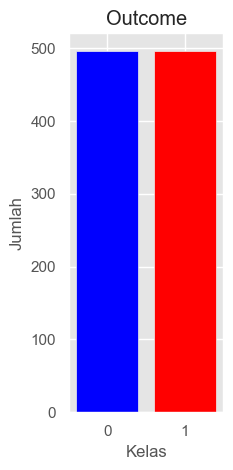

In [159]:
# Jumlah kelas setelah SMOTE
plt.subplot(1, 3, 3)
bars = plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values, color=['red', 'blue'])
plt.title('Outcome')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

Split Data Train & Test

Data train = 80%
Data test = 20%

In [160]:
X_train, X_test, y_train , y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=0)

Machine Learning Algorithms

Random Forest

In [186]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [188]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9962168978562421
0.9396984924623115
[[ 87   6]
 [  6 100]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        93
           1       0.94      0.94      0.94       106

    accuracy                           0.94       199
   macro avg       0.94      0.94      0.94       199
weighted avg       0.94      0.94      0.94       199



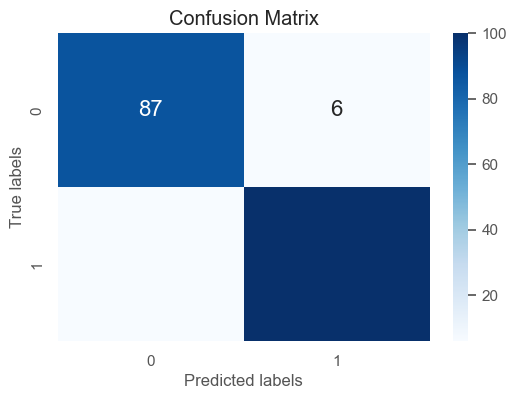

In [190]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Logistic Regression

In [163]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [164]:
y_pred = log_reg.predict(X_test)

In [165]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8562421185372006

In [166]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [167]:
confusion_matrix(y_test, y_pred)

array([[80, 13],
       [16, 90]], dtype=int64)

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        93
           1       0.87      0.85      0.86       106

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.85      0.85      0.85       199



SVM

In [169]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [170]:
# best_parameter
grid_search.best_params_

{'C': 15, 'gamma': 0.1}

In [171]:
grid_search.best_score_

0.8840378950720484

In [172]:
svc = SVC(C=15, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9596469104665826
0.8994974874371859
[[80 13]
 [ 7 99]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        93
           1       0.88      0.93      0.91       106

    accuracy                           0.90       199
   macro avg       0.90      0.90      0.90       199
weighted avg       0.90      0.90      0.90       199



Decision Tree

In [173]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8894472361809045
[[81 12]
 [10 96]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        93
           1       0.89      0.91      0.90       106

    accuracy                           0.89       199
   macro avg       0.89      0.89      0.89       199
weighted avg       0.89      0.89      0.89       199



In [175]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=5, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [176]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [177]:
grid_search_dt.best_score_

0.8650664755990766

In [178]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9003783102143758
0.9195979899497487
[[84  9]
 [ 7 99]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        93
           1       0.92      0.93      0.93       106

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.92      0.92      0.92       199



Perbandingan Beberapa Model berdasarkan Akurasi

In [182]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,93.47
2,Decision Tree Classifier,91.96
1,SVM,89.95
0,Logistic Regression,85.43


Perbandingan kinerja model berdasarkan ROC

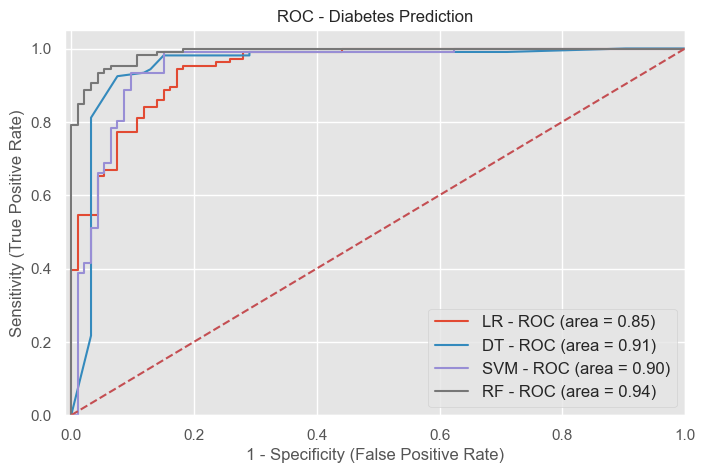

In [184]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'RF',
    'model': rand_clf,
},
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

Save Model

In [213]:
# import pickle
# model = gbc_acc
# pickle.dump(model, open("diabetes.pkl",'wb'))